<a href="https://colab.research.google.com/github/Bibhukalyan/MvvmPractice/blob/master/m22ai537_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import seaborn as sns
from pandas import read_csv
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

drive.mount('/content/drive')
salary_data_set = pd.read_csv('/content/drive/My Drive/programming_assignment_ml1_wine/Salary_dataset.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Get the heder info.
salary_data_set.head(10)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [ ]:
# Info. about dataset 
salary_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [ ]:
# finding presence of any null value
salary_data_set.isnull().values.any()

False

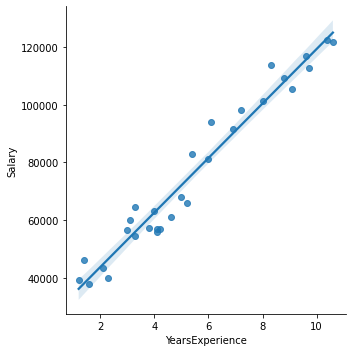

In [ ]:
# checking corelation between Salary and YearsExperience
sns.lmplot(x='YearsExperience',y='Salary',data=salary_data_set)

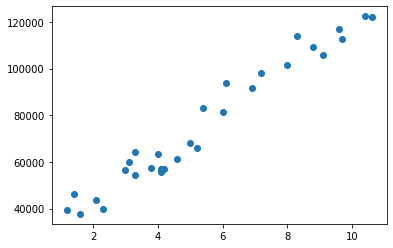

In [ ]:
# remove unwanted data
salary_data_set.drop(["Unnamed: 0"],axis=1,inplace=True)
salary_data_set.head()
plt.scatter(salary_data_set.YearsExperience, salary_data_set.Salary)

In [ ]:
# checking our feature and target set
features = salary_data_set['YearsExperience']
target = salary_data_set['Salary']
print("Features: ",features)
print("Target:", target)

Features:  0      1.2
1      1.4
2      1.6
3      2.1
4      2.3
5      3.0
6      3.1
7      3.3
8      3.3
9      3.8
10     4.0
11     4.1
12     4.1
13     4.2
14     4.6
15     5.0
16     5.2
17     5.4
18     6.0
19     6.1
20     6.9
21     7.2
22     8.0
23     8.3
24     8.8
25     9.1
26     9.6
27     9.7
28    10.4
29    10.6
Name: YearsExperience, dtype: float64
Target: 0      39344.0
1      46206.0
2      37732.0
3      43526.0
4      39892.0
5      56643.0
6      60151.0
7      54446.0
8      64446.0
9      57190.0
10     63219.0
11     55795.0
12     56958.0
13     57082.0
14     61112.0
15     67939.0
16     66030.0
17     83089.0
18     81364.0
19     93941.0
20     91739.0
21     98274.0
22    101303.0
23    113813.0
24    109432.0
25    105583.0
26    116970.0
27    112636.0
28    122392.0
29    121873.0
Name: Salary, dtype: float64


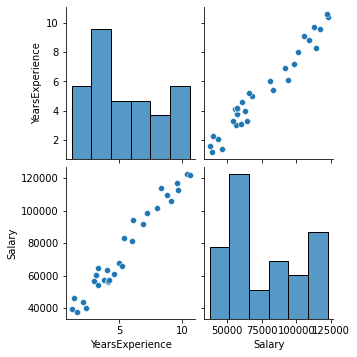

In [ ]:
# checking correlation using pair plot
sns.pairplot(salary_data_set)

In [ ]:
# training and test dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=45)

In [ ]:
# use the linear regression and test the prediction and test the accuracy
regression = LinearRegression()
regression.fit(X_train,y_train)


ValueError: ignored

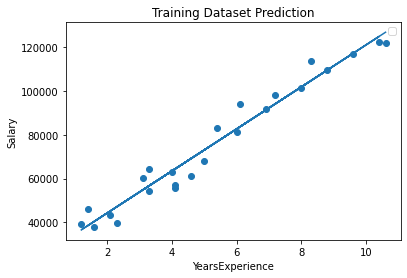

In [ ]:
# transforming to 2D array
X_train = np.array(X_train).reshape((len(X_train),1))
y_train = np.array(y_train).reshape((len(y_train),1))
X_train,y_train
X_test = np.array(X_test).reshape(len(X_test), 1)
y_test = np.array(y_test).reshape(len(y_test), 1)
X_test,y_test
regression.fit(X_train,y_train)
# Predicting using Linear Regression on Trining dataset
y_train_pred = regression.predict(X_train)
y_train_pred
plt.figure()
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred)
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title('Training Dataset Prediction')
plt.legend()
plt.show()

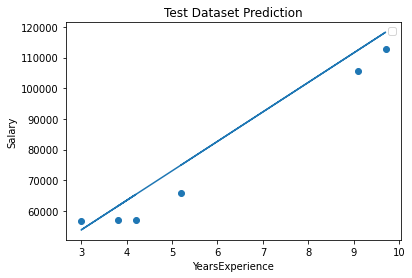

In [ ]:
# Predicting using Linear Regression on Test dataset
y_test_pred = regression.predict(X_test)
y_test_pred
plt.figure()
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred)
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title('Test Dataset Prediction')
plt.legend()
plt.show()

In [ ]:
# use the linear regression and test the prediction and test the accuracy using
#Mean Square Error(MSE) and R2 score
from sklearn import metrics
print("variance:", round(metrics.explained_variance_score(y_test, y_test_pred), 2))
print("MSE: ", round(metrics.mean_squared_error(y_test, y_test_pred), 2))
print("R2 score =", round(metrics.r2_score(y_test, y_test_pred), 2))

variance: 0.97
MSE:  42510267.47
R2 score = 0.93


In [ ]:
# creating our own implemenation of Lenear Regression
import scipy.stats as stats
def linear_regression(features, target):
    length = len(features)
    features_mean = features.mean()
    target_mean = target.mean()
    
    B1_number = ((features - features_mean) * (target - target_mean)).sum()
    B1_density = ((features - features_mean)**2).sum()
    B1 = B1_number / B1_density
    B0 = target_mean - (B1*features_mean)
    reg_line = 'y = {} + {}β'.format(B0, round(B1, 3))
    return (B0, B1, reg_line)

# defining Correlation coefficient
def corr_coef(features, target):
    length = len(features)    
    number = (length * (features * target).sum()) - (features.sum() * target.sum())
    density = np.sqrt((length * (features**2).sum() - features.sum()**2) * (length * (target**2).sum() - target.sum()**2))
    coff = number / density
    return coff

# prediction
def predict(B0, B1, new_features):
    predict = B0 + B1 * new_features
    return predict

# Log likelihood function
def log_likelihood(parameters, features, target): 
    m = parameters[0] 
    b = parameters[1] 
    sigma = parameters[2] 
    
    y_exp = m * features + b 
        
    L = np.sum(stats.norm.logpdf(target - y_exp, loc = 0, scale=sigma))
    return -L
    
# Constraints function
def constraints(parameters):
    sigma = parameters[2]
    return sigma

cons = {
    'type': 'ineq',
    'fun': constraints
}

B0, B1, regression_line = linear_regression(features, target)
print('Linear Regression: ', regression_line)
corr_coeff = corr_coef(features, target)
print('corr_coeff: ', corr_coeff)
print('R_square: ', corr_coeff**2)
print('Fit check: ', corr_coeff**2)

Linear Regression:  y = 24848.2039665232 + 9449.962β
corr_coeff:  0.9782416184887616
R_square:  0.9569566641435118
Fit check:  0.9569566641435118


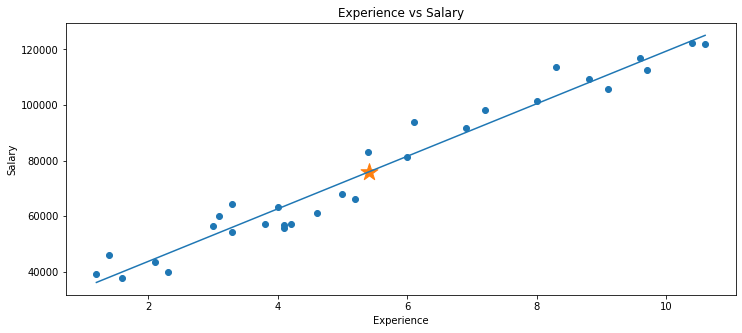

In [ ]:
# corelation among salary and years of experience predicted
plt.figure(figsize=(12,5))
plt.scatter(features, target)
plt.title('Experience vs Salary')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.plot(features, B0 + B1*features)
plt.scatter(x=features.mean(), y=target.mean(), marker='*', s=10**2.5) 
reg_line = 'y = {} + {}β'.format(B0, round(B1, 3))

In [ ]:
# New training and test data set
features_new = salary_data_set['YearsExperience'][:90]
target_new = salary_data_set['Salary'][:90]
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(features_new, target_new, test_size=0.2, random_state=45)
X_train_new, X_test_new, y_train_new, y_test_new

(29    10.6
 7      3.3
 10     4.0
 19     6.1
 24     8.8
 6      3.1
 22     8.0
 23     8.3
 18     6.0
 17     5.4
 2      1.6
 12     4.1
 20     6.9
 26     9.6
 8      3.3
 14     4.6
 1      1.4
 15     5.0
 4      2.3
 28    10.4
 21     7.2
 0      1.2
 3      2.1
 11     4.1
 Name: YearsExperience, dtype: float64, 16    5.2
 27    9.7
 25    9.1
 5     3.0
 13    4.2
 9     3.8
 Name: YearsExperience, dtype: float64, 29    121873.0
 7      54446.0
 10     63219.0
 19     93941.0
 24    109432.0
 6      60151.0
 22    101303.0
 23    113813.0
 18     81364.0
 17     83089.0
 2      37732.0
 12     56958.0
 20     91739.0
 26    116970.0
 8      64446.0
 14     61112.0
 1      46206.0
 15     67939.0
 4      39892.0
 28    122392.0
 21     98274.0
 0      39344.0
 3      43526.0
 11     55795.0
 Name: Salary, dtype: float64, 16     66030.0
 27    112636.0
 25    105583.0
 5      56643.0
 13     57082.0
 9      57190.0
 Name: Salary, dtype: float64)

In [ ]:
# Predicted values for test dataset and train dataset
y_pred_new=[]
for element in X_test_new:
  y_pred_new.append(predict(B0, B1, element))

print("Mean absolute error for test set: ", metrics.mean_absolute_error(y_test_new,y_pred_new), 
      "Mean square error for test set: ", metrics.mean_squared_error(y_test_new,y_pred_new))

y_pred_new=[]
for element in X_train_new:
  y_pred_new.append(predict(B0, B1, element))

print("Mean absolute error for training set:", metrics.mean_absolute_error(y_train_new,y_pred_new), 
      "Mean square error for training set:", metrics.mean_squared_error(y_train_new,y_pred_new))

Mean absolute error for test set:  5260.62053138166 Mean square error for test set:  31036163.54752496
Mean absolute error for training set: 4490.096478959006 Mean square error for training set: 31329648.765969943


In [ ]:
# Maximum Likelihood Estimation (MLE)
mle = minimize(log_likelihood, np.array([2, 2, 2]), args=(features_new,target_new,), constraints=cons,method='L-BFGS-B')
mle

/usr/local/lib/python3.9/dist-packages/scipy/optimize/_minimize.py:565: RuntimeWarning: Method L-BFGS-B cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,


  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 301.44117755624126
        x: [ 9.448e+03  2.486e+04  5.592e+03]
      nit: 62
      jac: [ 0.000e+00  0.000e+00  5.684e-06]
     nfev: 256
     njev: 64
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>

In [ ]:
# Predicted values for test set
y_predict_mle = mle.x[0] * X_test_new + mle.x[1]
print("Y predicted by MLE", y_predict_mle)
y_predict_train_mle = mle.x[0] * X_train_new + mle.x[1]
print("Y predicted by MLE for tained dataset", y_predict_train_mle)

Y predicted by MLE 16     73991.035390
27    116506.624473
25    110837.879262
5      53205.636282
13     64543.126704
9      60763.963230
Name: YearsExperience, dtype: float64
Y predicted by MLE for tained dataset 29    125009.742290
7      56040.008888
10     62653.544967
19     82494.153206
24    108003.506657
6      54150.427151
22    100445.179708
23    103279.552314
18     81549.362338
17     75880.617127
2      39978.564123
12     63598.335836
20     90052.480155
26    115561.833605
8      56040.008888
14     68322.290178
1      38088.982386
15     72101.453653
4      46592.100202
28    123120.160553
21     92886.852760
0      36199.400649
3      44702.518465
11     63598.335836
Name: YearsExperience, dtype: float64


In [ ]:
# Predicted values for test dataset and train dataset
print("Mean absolute error for MLE: ", metrics.mean_absolute_error(y_test_new,y_predict_mle), 
"Mean square error for (MLE): ", metrics.mean_squared_error(y_test_new,y_predict_mle))

print("Mean absolute error for training set using (MLE):", metrics.mean_absolute_error(y_train_new,y_predict_train_mle), 
      "Mean square error for training set  using (MLE):", metrics.mean_squared_error(y_train_new,y_predict_train_mle))

Mean absolute error for MLE:  5259.832129665024 Mean square error for (MLE):  31038444.758417998
Mean absolute error for training set using (MLE): 4490.597199589517 Mean square error for training set  using (MLE): 31329127.885070775
